In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
df = pd.read_csv('diamonds.csv')
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width,height
0,2714,0.33,Ideal,H,SI1,61.7,55.0,564,4.43,4.46,2.74
1,14653,1.20,Ideal,I,VS2,62.1,57.0,5914,6.78,6.71,4.19
2,52760,0.62,Ideal,D,VS1,61.0,57.0,2562,5.51,5.54,3.37
3,48658,0.34,Good,H,VS2,63.1,56.0,537,4.41,4.46,2.80
4,14812,1.20,Ideal,E,SI2,62.5,55.0,5964,6.77,6.84,4.25


In [4]:
df.tail(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width,height
19997,19971,1.50,Premium,D,SI2,58.9,60.0,8518,7.48,7.45,4.40
19998,25278,2.26,Very Good,H,SI2,63.3,59.0,13923,8.35,8.26,5.25
19999,52010,0.78,Good,F,SI2,62.7,61.0,2444,5.80,5.84,3.65


In [5]:
df.shape

(20000, 11)

In [8]:
impossible_rows = df[(df['length'] <= 0) | (df['width'] <= 0) | (df['height'] <= 0)].index
impossible_rows

Index([743, 1060, 3182, 3747, 12181, 18222], dtype='int64')

In [10]:
display(impossible_rows.tolist())
display(df.loc[impossible_rows])

[743, 1060, 3182, 3747, 12181, 18222]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,length,width,height
743,13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
1060,2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
3182,27503,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
3747,49556,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
12181,27112,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
18222,24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0


In [12]:
df.drop(impossible_rows, inplace=True)
df.shape

(19994, 11)

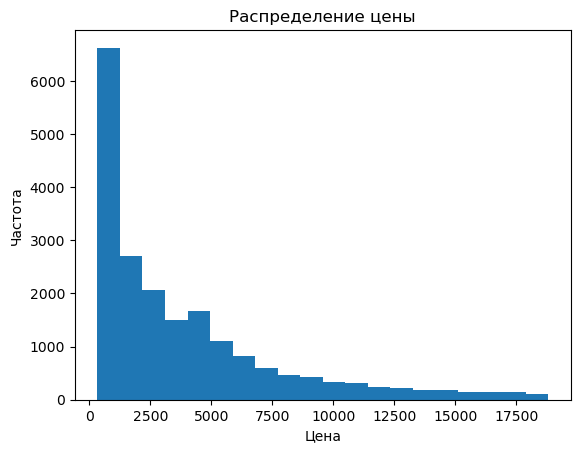

In [14]:
plt.hist(df['price'], bins=20)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цены')
plt.show()

In [16]:
average_price_by_clarity = df.groupby('clarity')['price'].mean().loc[['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']]
display(average_price_by_clarity)

clarity
IF      2625.806748
VVS1    2530.888889
VVS2    3254.350581
VS1     3802.706833
VS2     3892.918925
SI1     4010.302913
SI2     4948.347319
I1      3806.791519
Name: price, dtype: float64

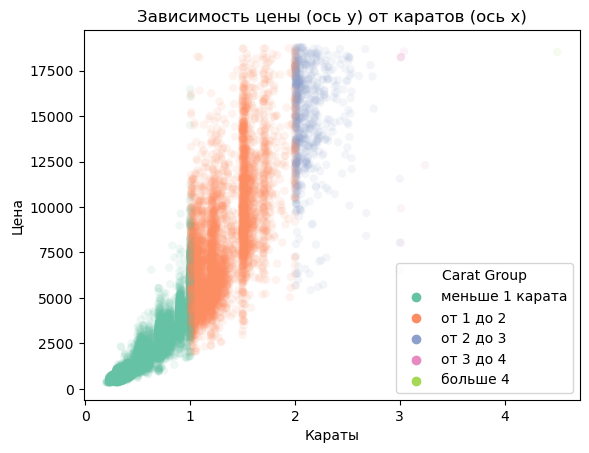

In [57]:
df['color'] = pd.cut(df['carat'], bins=[0, 1, 2, 3, 4, float('inf')])
scatter_plot = sns.scatterplot(x="carat", y="price",
                               hue="color",
                               palette="Set2",
                               sizes=(1, 8), linewidth=0,
                               data=df,
                               alpha=0.1)
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles, title='Carat Group', labels = [
                         'меньше 1 карата',
                         'от 1 до 2',
                         'от 2 до 3',
                         'от 3 до 4',
                         'больше 4'])
plt.xlabel('Караты')
plt.ylabel('Цена')
plt.title('Зависимость цены (ось y) от каратов (ось x)')
plt.show()

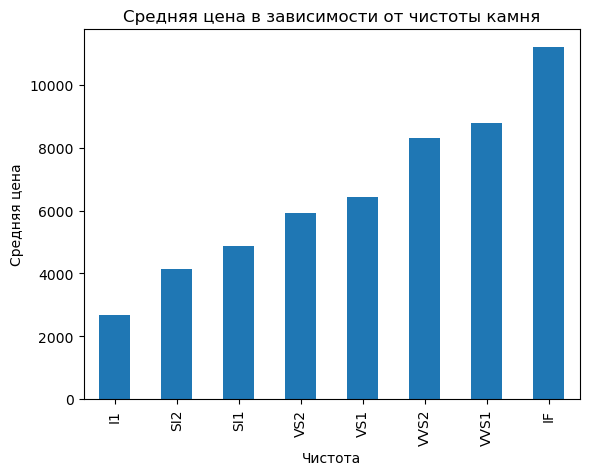

In [59]:
carat_095_105 = df[(df['carat'] >= 0.95) & (df['carat'] <= 1.05)]
new_clarity_diamond = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

average_price_by_clarity = carat_095_105.groupby('clarity')['price'].mean().loc[new_clarity_diamond]
average_price_by_clarity.plot(kind='bar')
plt.xlabel('Чистота')
plt.ylabel('Средняя цена')
plt.title('Средняя цена в зависимости от чистоты камня')
plt.show()

In [63]:
cut_asc = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
pivot_table = df.pivot_table(index='cut', 
                             values='price', 
                             aggfunc=['mean', 'std']).loc[cut_asc]
pivot_table

,mean,std
,price,price
cut,,
Fair,4168.688226,3171.546995
Good,3861.578778,3533.330533
Very Good,3916.678936,3830.280870
Premium,4545.885062,4337.413496
Ideal,3457.838795,3755.580635


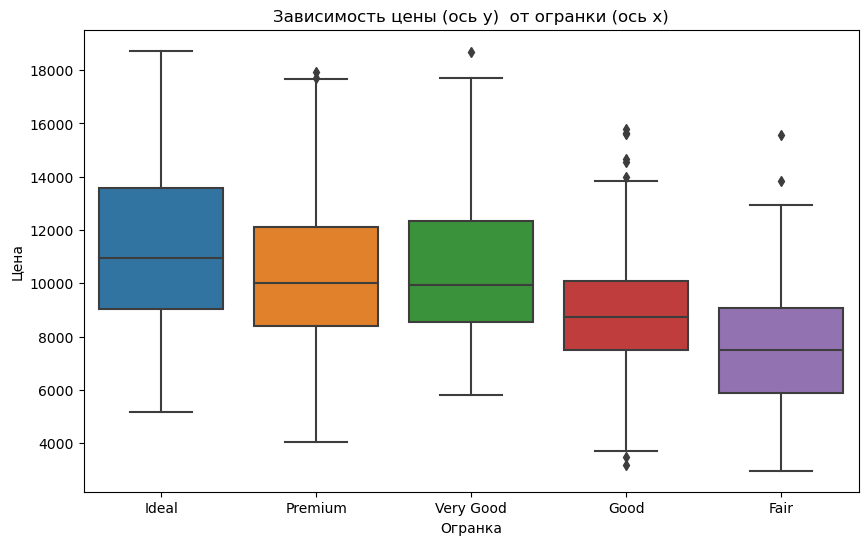

In [75]:
slice = df[(df['carat'] >= 1.4) & (df['carat'] <= 1.6)]
cut_desc= ['Ideal','Premium', 'Very Good', 'Good','Fair']

plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=slice, order=cut_desc)
plt.xlabel('Огранка')
plt.ylabel('Цена')
plt.title('Зависимость цены (ось y)  от огранки (ось х)')
plt.show()